# 1. Panorama General de Tickets

### 1.1 Carga y unificación de datos

In [25]:
import pandas as pd
import json

# Cargar archivos JSON
with open("Tickets de atencion a socios (1).json", encoding="utf-8") as f1:
    data1 = json.load(f1)
with open("Tickets de atencion a socios (2) (1).json", encoding="utf-8") as f2:
    data2 = json.load(f2)

# Unificar
tickets = []
for item in data1 + data2:
    ticket = item.get("helpdesk_ticket", {})
    tickets.append({
        "id": ticket.get("id"),
        "created_at": ticket.get("created_at"),
        "updated_at": ticket.get("updated_at"),
        "status": ticket.get("status_name"),
        "priority": ticket.get("priority_name"),
        "responder_name": ticket.get("responder_name"),
        "requester_name": ticket.get("requester_name"),
        "subject": ticket.get("subject"),
        "description": ticket.get("description"),
        "agent_reply_count": ticket.get("reports_data", {}).get("agent_reply_count"),
        "customer_reply_count": ticket.get("reports_data", {}).get("customer_reply_count"),
        "first_response_time": ticket.get("ticket_states", {}).get("first_response_time"),
        "resolved_at": ticket.get("ticket_states", {}).get("resolved_at"),
        "first_assigned_at": ticket.get("ticket_states", {}).get("first_assigned_at"),
        "agent_responded_at": ticket.get("ticket_states", {}).get("agent_responded_at"),
        "requester_responded_at": ticket.get("ticket_states", {}).get("requester_responded_at")
    })

df = pd.DataFrame(tickets)
df.head()

,id,created_at,updated_at,status,priority,responder_name,requester_name,subject,description,agent_reply_count,customer_reply_count,first_response_time,resolved_at,first_assigned_at,agent_responded_at,requester_responded_at
0,150156525929,2025-05-09T19:57:30-06:00,2025-05-10T16:11:53-06:00,Open,Low,Diego Rodriguez,Eduardo Rodriguez,Diego,Diego,9.0,32.0,2025-05-09T19:57:46-06:00,None,2025-05-09T19:57:31-06:00,2025-05-09T20:26:59-06:00,2025-05-09T20:23:43-06:00
1,150156528181,2025-05-09T20:45:20-06:00,2025-05-12T20:09:23-06:00,Resolved,Low,Diego Rodriguez,Daniel De La Fuente,"Hola, quisiera aclarar una duda","Hola, quisiera aclarar una duda",6.0,13.0,2025-05-09T20:46:09-06:00,2025-05-12T20:09:23-06:00,2025-05-09T20:45:23-06:00,2025-05-09T20:52:54-06:00,2025-05-09T20:52:18-06:00
2,150156564239,2025-05-10T09:24:48-06:00,2025-05-10T22:40:37-06:00,Resolved,Low,No Agent,Prof Giovanni Acevedo,Hola,Hola,3.0,5.0,2025-05-10T18:16:52-06:00,2025-05-10T22:40:37-06:00,None,2025-05-10T19:59:40-06:00,2025-05-10T18:33:07-06:00
3,150156565768,2025-05-10T09:48:59-06:00,2025-05-10T14:03:55-06:00,Resolved,Low,Diego Rodriguez,Elena Palomeras,"Hola, necesito atención inmediata.","Hola, necesito atención inmediata.",2.0,1.0,2025-05-10T09:59:35-06:00,2025-05-10T14:03:55-06:00,2025-05-10T09:59:46-06:00,2025-05-10T14:03:49-06:00,2025-05-10T09:59:53-06:00
4,150156591201,2025-05-10T17:24:25-06:00,2025-05-13T19:35:34-06:00,Closed,Low,Angel Hernández,anapaubaez,"Hola, necesito atención inmediata.","Hola, necesito atención inmediata.",13.0,17.0,2025-05-10T17:26:08-06:00,2025-05-13T19:35:34-06:00,2025-05-10T17:24:27-06:00,2025-05-12T12:43:54-06:00,2025-05-13T10:11:43-06:00


### 1.2 Conteo General de Tickets por Estado

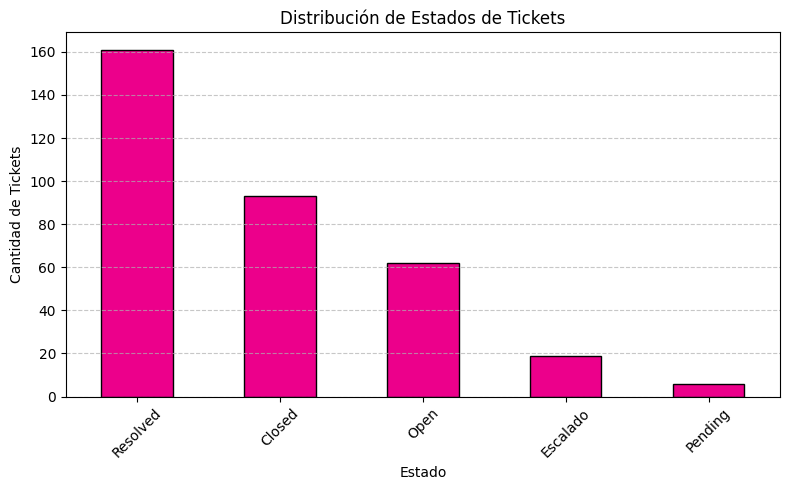

In [64]:
import matplotlib.pyplot as plt

estado_counts = df['status'].value_counts()

plt.figure(figsize=(8, 5))
estado_counts.plot(kind='bar', color='#EC008B', edgecolor='black')
plt.title('Distribución de Estados de Tickets')
plt.xlabel('Estado')
plt.ylabel('Cantidad de Tickets')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 1.3 Tickets por Nivel de Prioridad

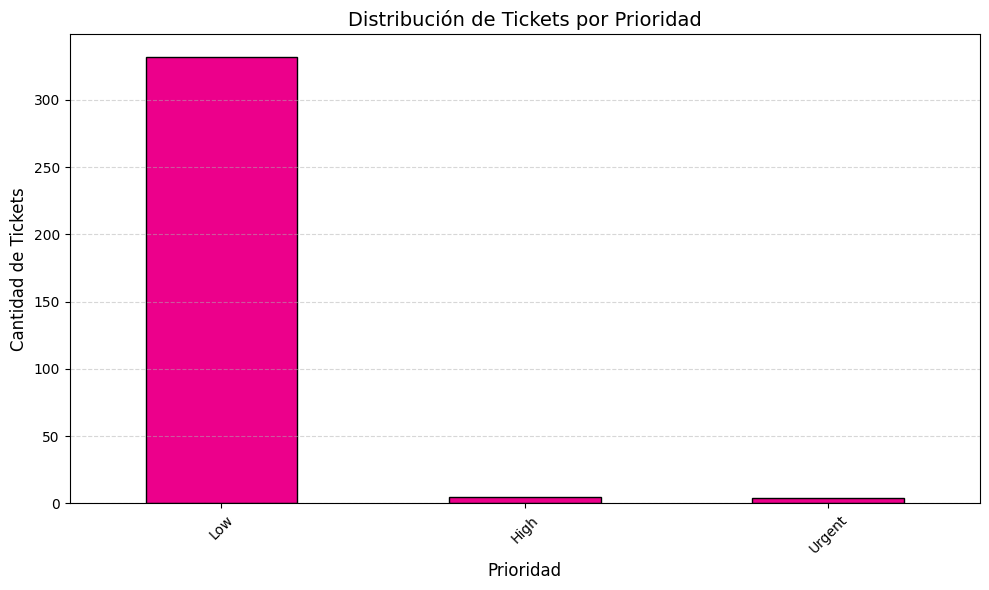

In [68]:
prioridad_counts = df['priority'].value_counts()

plt.figure(figsize=(10, 6))
prioridad_counts.plot(kind='bar', color='#EC008B', edgecolor='black')
plt.title('Distribución de Tickets por Prioridad', fontsize=14)
plt.xlabel('Prioridad', fontsize=12)
plt.ylabel('Cantidad de Tickets', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 1.4 Distribución de Tickets por Agente Asignado

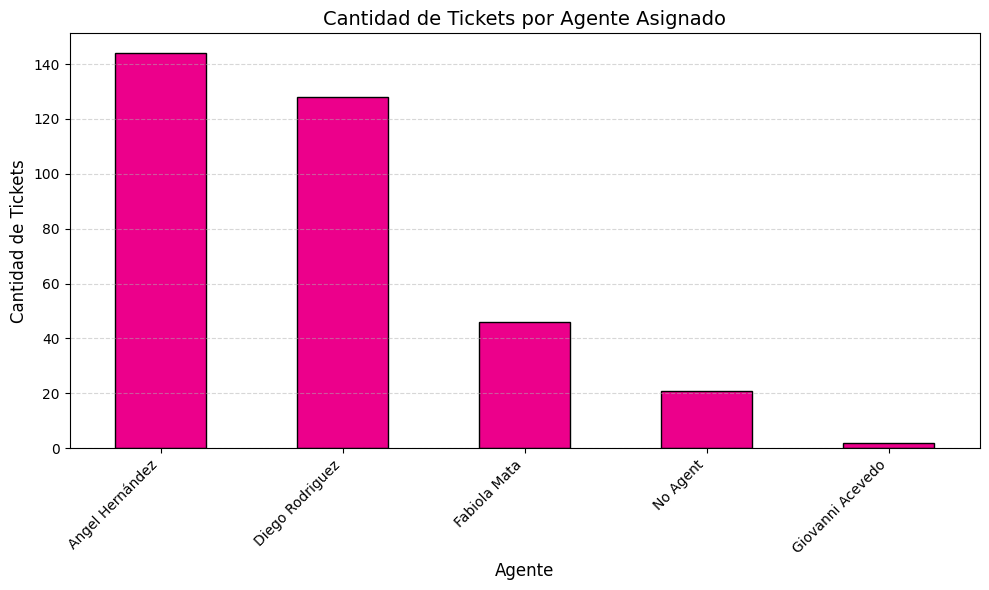

In [34]:
agente_counts = df['responder_name'].fillna('No agent').value_counts()
plt.figure(figsize=(10, 6))
agente_counts.plot(kind='bar', color='#EC008B', edgecolor='black')
plt.title('Cantidad de Tickets por Agente Asignado', fontsize=14)
plt.xlabel('Agente', fontsize=12)
plt.ylabel('Cantidad de Tickets', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 1.5 Serie Temporal de Tickets por Fecha de Creación

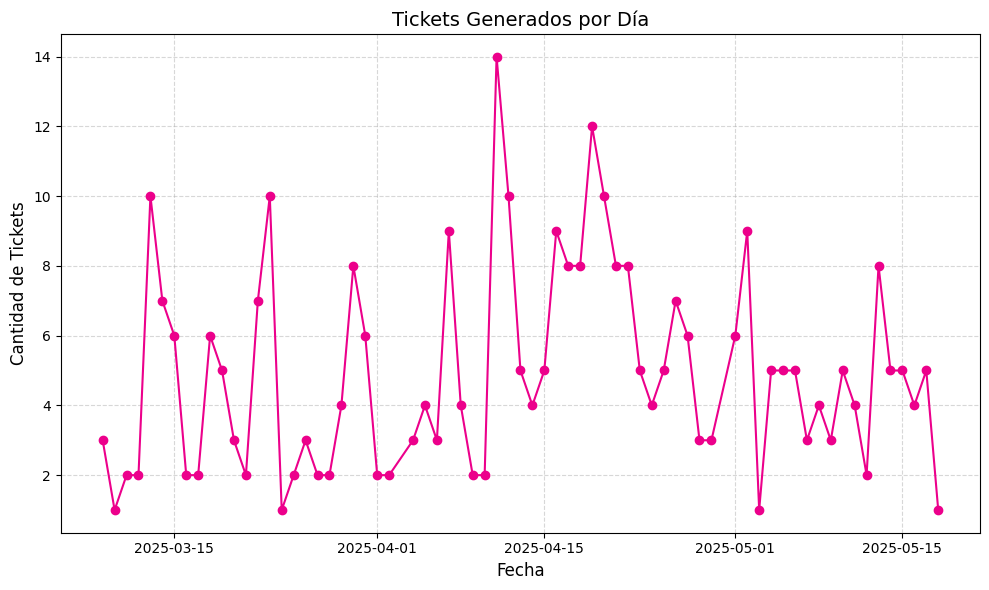

In [31]:
df['created_at'] = pd.to_datetime(df['created_at'])
tickets_por_dia = df.groupby(df['created_at'].dt.date).size()
plt.figure(figsize=(10, 6))
tickets_por_dia.plot(kind='line', marker='o', color='#EC008B')
plt.title('Tickets Generados por Día', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Cantidad de Tickets', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 2. Cumplimiento de SLA y Tiempos de Respuesta

### 2.1 Conversión de Fechas y Cálculo de Tiempos

In [43]:
# Asegurar que las columnas de fecha estén en formato datetime
df['created_at'] = pd.to_datetime(df['created_at'])
df['first_response_time'] = pd.to_datetime(df['first_response_time'])

# Calcular duración en minutos desde que se creó el ticket hasta la primera respuesta
df['minutos_primera_respuesta'] = (df['first_response_time'] - df['created_at']).dt.total_seconds() / 60

# Verificar resumen estadístico
df['minutos_primera_respuesta'].describe()

count    307.000000
mean      10.615147
std       58.753629
min        0.183333
25%        0.366667
50%        0.600000
75%        1.233333
max      632.333333
Name: minutos_primera_respuesta, dtype: float64

### 2.2 Histograma: Distribución de Tiempos de Primera Respuesta

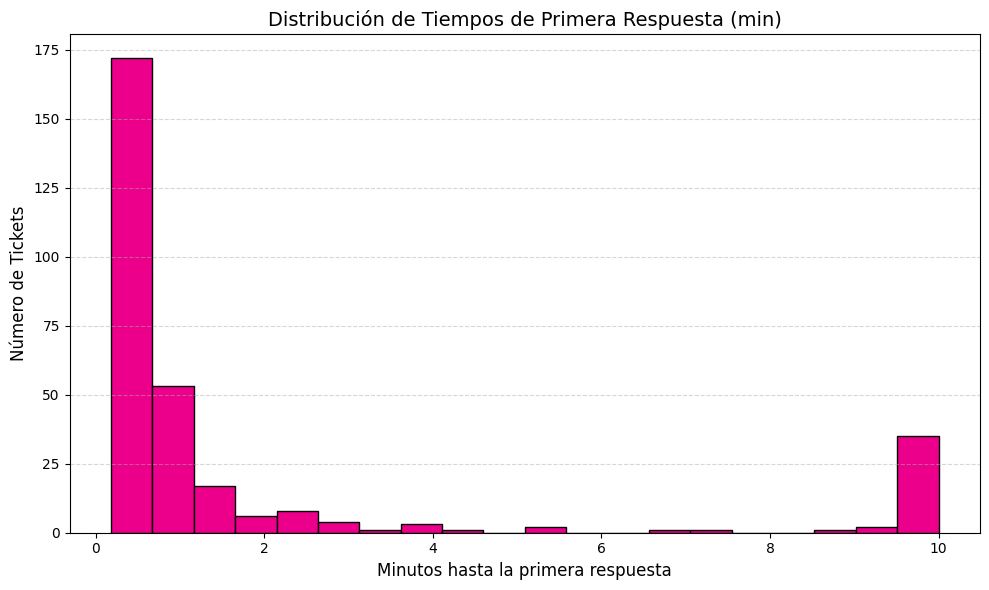

In [46]:
plt.figure(figsize=(10, 6))
df['minutos_primera_respuesta'].dropna().clip(upper=10).plot.hist(bins=20, color='#EC008B', edgecolor='black')
plt.title('Distribución de Tiempos de Primera Respuesta (min)', fontsize=14)
plt.xlabel('Minutos hasta la primera respuesta', fontsize=12)
plt.ylabel('Número de Tickets', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 2.3 Boxplot: Comparación por Agente

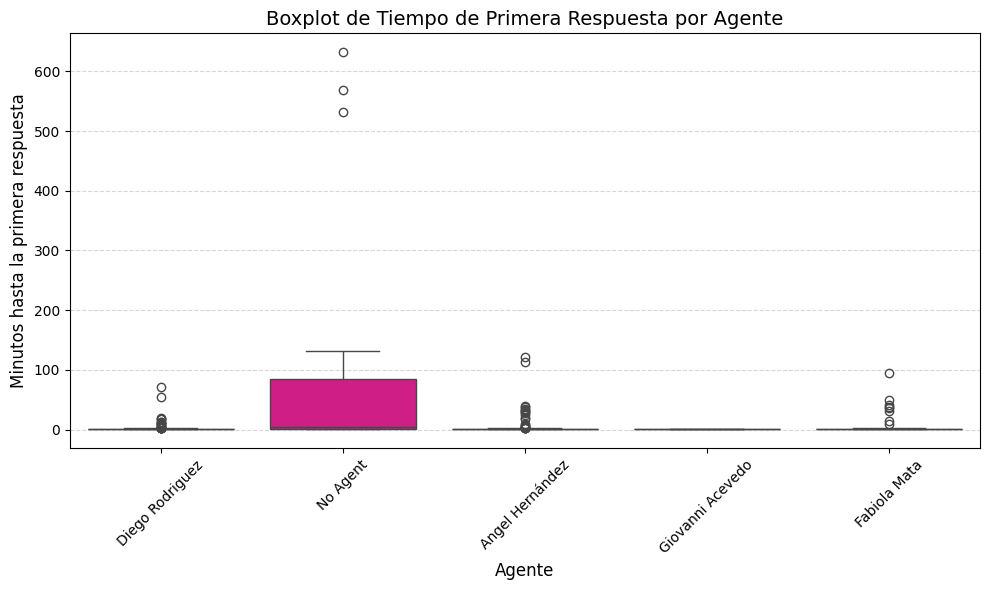

In [67]:
import seaborn as sns

custom_palette = ['#EC008B', '#F99FBF', '#99004C', '#FDB0D9', '#660033']
sns.set_palette(custom_palette)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='responder_name', y='minutos_primera_respuesta')
plt.title('Boxplot de Tiempo de Primera Respuesta por Agente', fontsize=14)
plt.xlabel('Agente', fontsize=12)
plt.ylabel('Minutos hasta la primera respuesta', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 2.4 Cumplimiento vs Incumplimiento del SLA

<Figure size 1000x600 with 0 Axes>

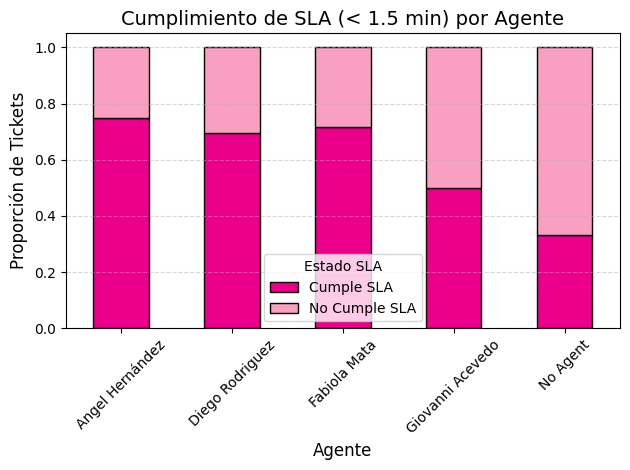

In [115]:
# Paso 1: Crear columna booleana si cumple SLA (< 1.5 min)
df['cumple_sla'] = df['minutos_primera_respuesta'] < 1.5

# Paso 2: Agrupar por agente y calcular proporción de cumplimiento de SLA
sla_por_agente = (
    df.groupby('responder_name')['cumple_sla']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
)

# Paso 3: Renombrar columnas para que sean más legibles
sla_por_agente = sla_por_agente.rename(columns={True: 'Cumple SLA', False: 'No Cumple SLA'})

# Paso 4: Graficar
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sla_por_agente[['Cumple SLA', 'No Cumple SLA']].plot(
    kind='bar',
    stacked=True,
    color=['#EC008B', '#F99FBF'],
    edgecolor='black'
)

plt.title('Cumplimiento de SLA (< 1.5 min) por Agente', fontsize=14)
plt.xlabel('Agente', fontsize=12)
plt.ylabel('Proporción de Tickets', fontsize=12)
plt.xticks(rotation=45)
plt.legend(['Cumple SLA', 'No Cumple SLA'], title='Estado SLA')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### 2.5 Porcentaje de Cumplimiento por Agente

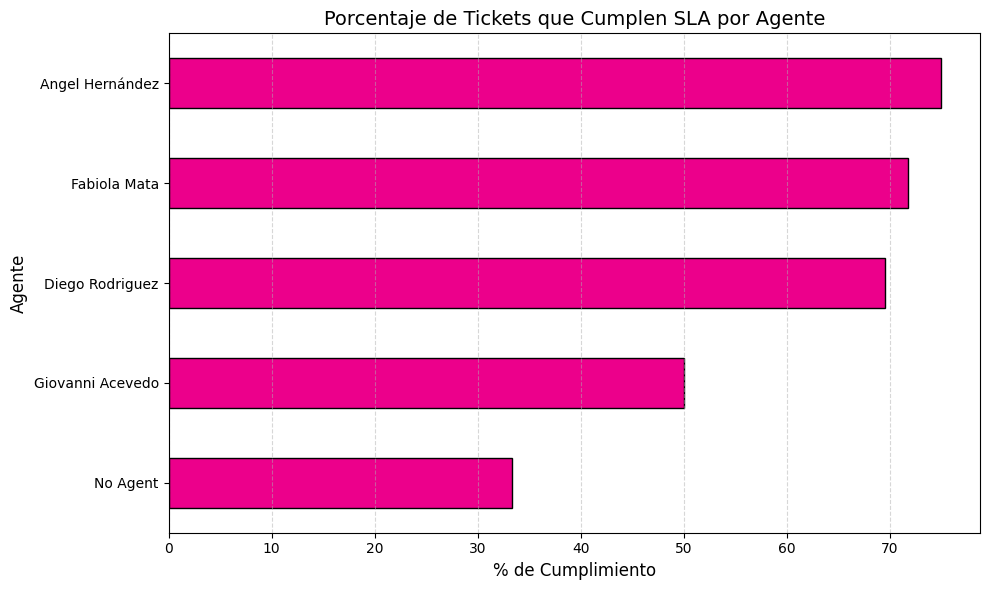

In [91]:
sla_por_agente = df.groupby('responder_name')['cumple_sla'].mean().sort_values() * 100

plt.figure(figsize=(10, 6))
sla_por_agente.plot(kind='barh', color='#EC008B', edgecolor='black')
plt.title('Porcentaje de Tickets que Cumplen SLA por Agente', fontsize=14)
plt.xlabel('% de Cumplimiento', fontsize=12)
plt.ylabel('Agente', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 3. Análisis de Agentes

### 3.1 Cantidad de Tickets por Agente

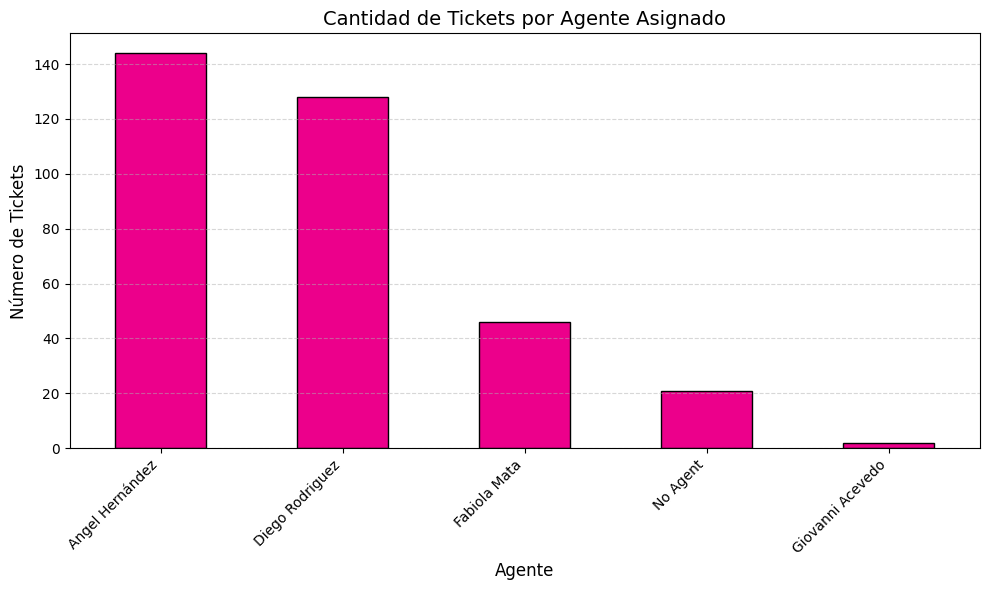

In [106]:
tickets_por_agente = df['responder_name'].fillna('No agent').value_counts()

plt.figure(figsize=(10, 6))
tickets_por_agente.plot(kind='bar', color='#EC008B', edgecolor='black')
plt.title('Cantidad de Tickets por Agente Asignado', fontsize=14)
plt.xlabel('Agente', fontsize=12)
plt.ylabel('Número de Tickets', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 3.2 Interacciones por Ticket: Agente vs Cliente

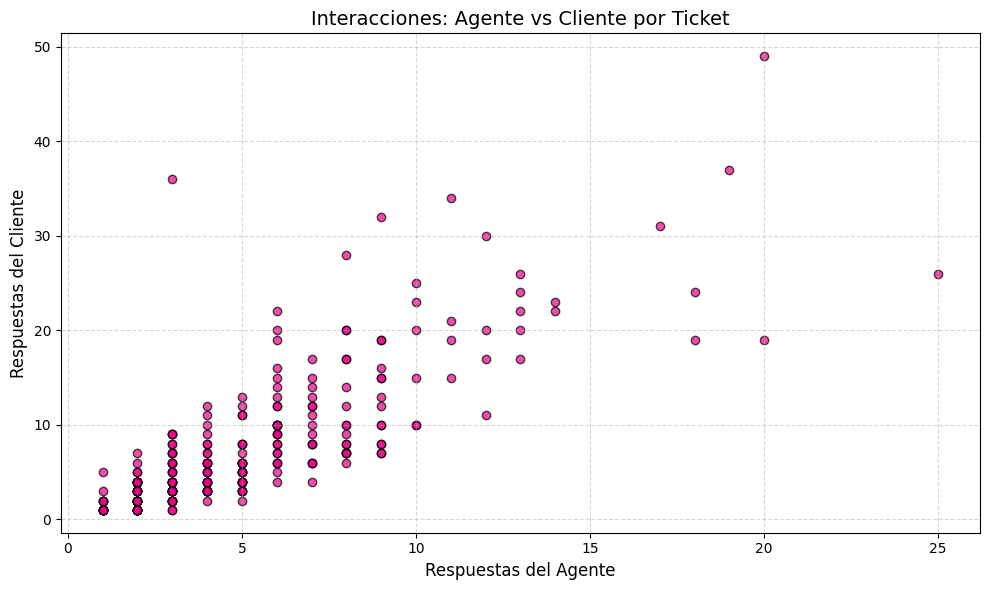

In [112]:
plt.figure(figsize=(10, 6))
plt.scatter(df['agent_reply_count'], df['customer_reply_count'], alpha=0.7, color='#EC008B', edgecolor='black')
plt.title('Interacciones: Agente vs Cliente por Ticket', fontsize=14)
plt.xlabel('Respuestas del Agente', fontsize=12)
plt.ylabel('Respuestas del Cliente', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 3.3 Casos con "No agent" asignado

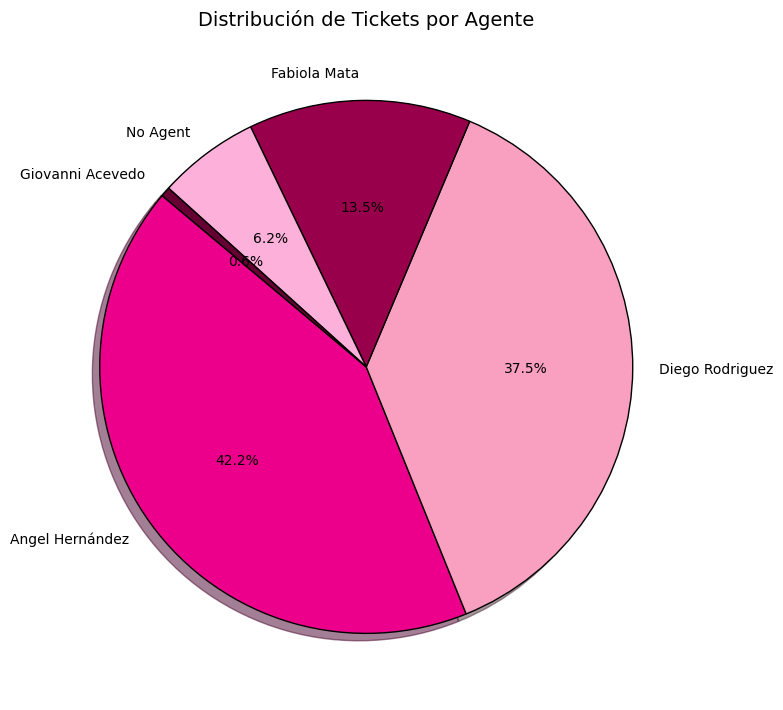

In [136]:
conteo_agentes = df['responder_name'].fillna('No Asignado').value_counts()

plt.figure(figsize=(8, 8))
conteo_agentes.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=140,
    shadow=True,
    wedgeprops={'edgecolor': 'black'}
)

plt.title('Distribución de Tickets por Agente', fontsize=14)
plt.ylabel('')  # Oculta etiqueta del eje Y
plt.tight_layout()
plt.show()



### 3.4 Detección de Actividad Fuera de Horario

In [124]:
df_horarios = pd.DataFrame([
    # DIEGO RODRIGUEZ
    {'responder_name': 'DIEGO RODRIGUEZ', 'día': 'lunes',    'inicio_turno': '14:00', 'fin_turno': '23:00'},
    {'responder_name': 'DIEGO RODRIGUEZ', 'día': 'martes',   'inicio_turno': '08:00', 'fin_turno': '12:00'},
    {'responder_name': 'DIEGO RODRIGUEZ', 'día': 'martes',   'inicio_turno': '18:00', 'fin_turno': '23:00'},
    {'responder_name': 'DIEGO RODRIGUEZ', 'día': 'miércoles','inicio_turno': '08:00', 'fin_turno': '12:00'},
    {'responder_name': 'DIEGO RODRIGUEZ', 'día': 'miércoles','inicio_turno': '18:00', 'fin_turno': '23:00'},
    {'responder_name': 'DIEGO RODRIGUEZ', 'día': 'jueves',   'inicio_turno': '17:30', 'fin_turno': '23:00'},
    {'responder_name': 'DIEGO RODRIGUEZ', 'día': 'viernes',  'inicio_turno': '17:30', 'fin_turno': '23:00'},

    # ANGEL HERNANDEZ
    {'responder_name': 'ANGEL HERNANDEZ', 'día': 'lunes',    'inicio_turno': '08:00', 'fin_turno': '17:00'},
    {'responder_name': 'ANGEL HERNANDEZ', 'día': 'martes',   'inicio_turno': '12:00', 'fin_turno': '21:00'},
    {'responder_name': 'ANGEL HERNANDEZ', 'día': 'miércoles','inicio_turno': '12:00', 'fin_turno': '21:00'},
    {'responder_name': 'ANGEL HERNANDEZ', 'día': 'jueves',   'inicio_turno': '08:00', 'fin_turno': '17:00'},
    {'responder_name': 'ANGEL HERNANDEZ', 'día': 'viernes',  'inicio_turno': '08:00', 'fin_turno': '17:00'},

    # FABIOLA MATA
    {'responder_name': 'FABIOLA MATA',    'día': 'sábado',   'inicio_turno': '09:00', 'fin_turno': '23:00'},
    {'responder_name': 'FABIOLA MATA',    'día': 'domingo',  'inicio_turno': '15:00', 'fin_turno': '21:00'},
], columns=['responder_name', 'día', 'inicio_turno', 'fin_turno'])

,responder_name,total_respuestas,respuestas_fuera_horario,% fuera de horario
3,Giovanni Acevedo,1,2,200.000000
4,No Agent,15,21,140.000000
1,Diego Rodriguez,112,128,114.285714
0,Angel Hernández,135,144,106.666667
2,Fabiola Mata,44,46,104.545455


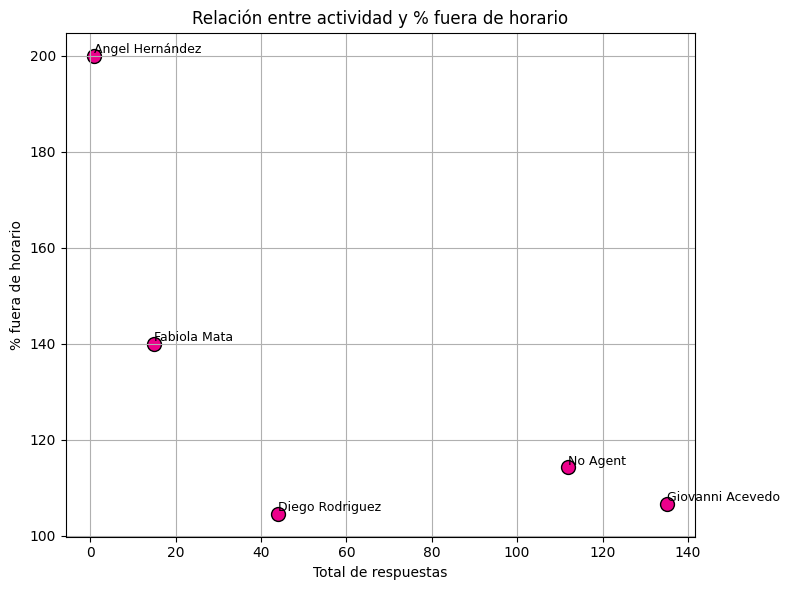

In [142]:
# Convertir a datetime
df['agent_responded_at'] = pd.to_datetime(df['agent_responded_at'])

# Extraer hora de la respuesta y día de la semana (en minúsculas para empatar con df_horarios)
df['hora_respuesta'] = df['agent_responded_at'].dt.time
df['día'] = df['agent_responded_at'].dt.day_name().str.lower()

# Hacemos merge para juntar los horarios por día y agente
df_merged = df.merge(df_horarios, on=['responder_name', 'día'], how='left')

# Convertir horarios a tipo datetime.time
df_merged['inicio_turno'] = pd.to_datetime(df_merged['inicio_turno'], format='%H:%M').dt.time
df_merged['fin_turno'] = pd.to_datetime(df_merged['fin_turno'], format='%H:%M').dt.time

from datetime import time

def fuera_de_turno(hora, inicio, fin):
    if pd.isnull(inicio) or pd.isnull(fin):
        return True  # si no hay horario asignado, se considera fuera
    if inicio < fin:
        return not (inicio <= hora <= fin)
    else:
        # turno cruza medianoche (ej. 22:00 a 06:00)
        return not (hora >= inicio or hora <= fin)

df_merged['fuera_de_horario'] = df_merged.apply(
    lambda row: fuera_de_turno(row['hora_respuesta'], row['inicio_turno'], row['fin_turno']),
    axis=1
)

# Conteo de respuestas fuera de horario por agente
reporte = df_merged.groupby('responder_name').agg(
    total_respuestas=('agent_responded_at', 'count'),
    respuestas_fuera_horario=('fuera_de_horario', 'sum')
).reset_index()

# Calcular porcentaje
reporte['% fuera de horario'] = 100 * reporte['respuestas_fuera_horario'] / reporte['total_respuestas']

# Mostrar ordenado
reporte.sort_values(by='% fuera de horario', ascending=False, inplace=True)
display(reporte)

plt.figure(figsize=(8, 6))
plt.scatter(reporte['total_respuestas'], reporte['% fuera de horario'], s=100, c='#EC008B', edgecolors='black')

for i, name in enumerate(reporte['responder_name']):
    plt.text(reporte['total_respuestas'][i], reporte['% fuera de horario'][i] + 0.5, name, fontsize=9)

plt.xlabel('Total de respuestas')
plt.ylabel('% fuera de horario')
plt.title('Relación entre actividad y % fuera de horario')
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Análisis Temático de Tickets

### 4.1 Limpieza de Texto

In [154]:
# Unir texto de 'subject' y 'description' en una nueva columna
df['texto_completo'] = df['subject'].fillna('') + ' ' + df['description'].fillna('')
df['texto_completo'] = df['texto_completo'].str.lower()
df['texto_completo'] = df['texto_completo'].replace('nan', '', regex=True)
df['texto_completo'] = df['texto_completo'].fillna('')
df['texto_completo'] = df['texto_completo'].str.replace(r'\s+', ' ', regex=True)

### 4.2 Nube de Palabras de Problemas Frecuentes

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


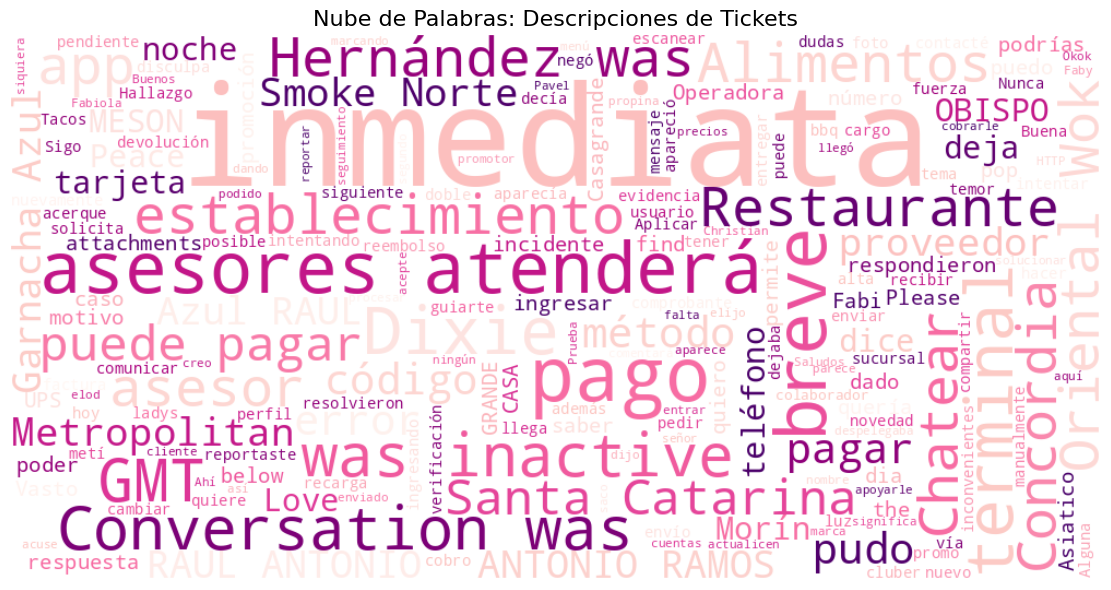

In [448]:
import nltk
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

# Descargar stopwords la primera vez
nltk.download("stopwords")

# Texto base
texto_total = " ".join(df["Descripción"].dropna())

# Eliminar números, fechas y horas (ej. '14th', '23rd', 'PM', 'AM')
texto_total = re.sub(r'\b\d{1,2}(st|nd|rd|th)?\b', '', texto_total)  # 23rd, 14th
texto_total = re.sub(r'\b(AM|PM|am|pm|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)\b', '', texto_total)
texto_total = re.sub(r'\d{1,4}', '', texto_total)  # quitar años y números sueltos

# Eliminar puntuación y palabras muy cortas (1 o 2 letras)
texto_total = re.sub(r'[^\w\s]', '', texto_total)  # quitar signos
texto_total = ' '.join([w for w in texto_total.split() if len(w) > 2])  # quitar palabras cortas

# Stopwords
stop_words = set(stopwords.words("spanish"))
stop_words.update([
    # Palabras comunes irrelevantes
    "clubers", "hola", "gracias", "adjunto", "día", "días", "ticket", "favor",
    "socio", "atención", "bot", "chat", "equipo", "responder", "pueden",
    "gracias", "buenas", "buen", "tardes", "ayuda", "ayudar", "solicito", "necesito", "apoyo",

    # Nombres de agentes o usuarios frecuentes
    "josue", "rivas", "muñoz", "diego", "rodriguez", "jesus", "martinez", "angel", "hernandez", "Giovanni",

    # Palabras en inglés irrelevantes o automáticas
    "timestamps", "team", "inbox", "all", "unassigned", "user", "take", "to", "assigned",

    # Meses, días y otros tokens no relevantes
    "mar", "may", "abril", "lunes", "martes", "miércoles", "jueves", "viernes", "sábado", "domingo",
    "conversación", "selecciona", "seleccione", "problema", "cuenta", "realice", "directamente", "consumidor", "Alberto", "Gomez", "morin"
])

# Crear la nube de palabras
wordcloud = WordCloud(
    width=1000, height=500, background_color="white",
    stopwords=stop_words, colormap="RdPu"
).generate(texto_total)

# Mostrar
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de Palabras: Descripciones de Tickets", fontsize=16)
plt.tight_layout()
plt.show()

### 4.3 Palabras Más Frecuentes

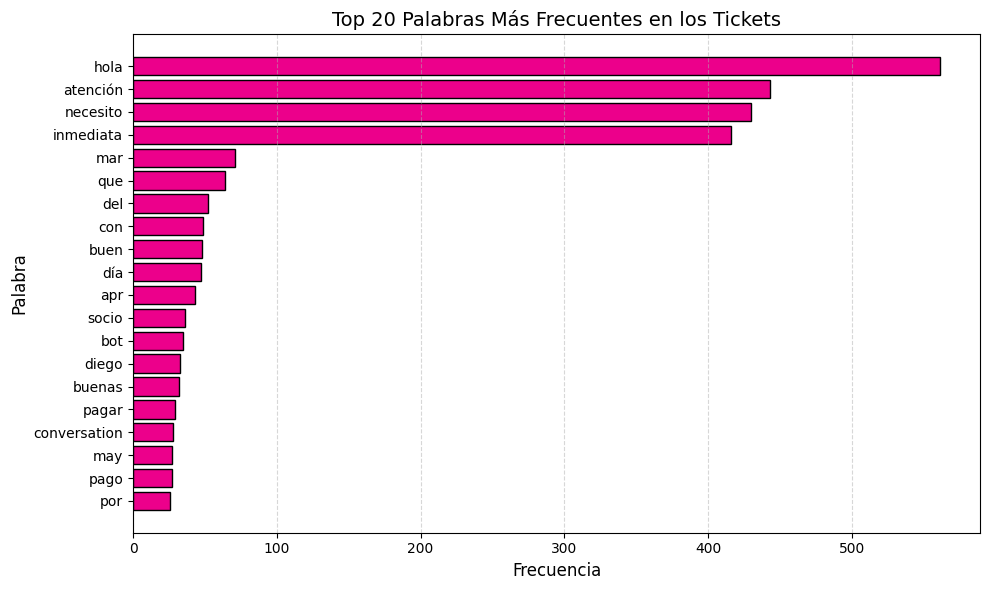

In [172]:
from collections import Counter
import re

# Tokenización simple
tokens = []
for text in df['texto_completo']:
    words = re.findall(r'\b[a-záéíóúüñ]{3,}\b', text)
    tokens.extend(words)

# Contar frecuencia
contador = Counter(tokens)
palabras_comunes = contador.most_common(20)

# Convertir a DataFrame
palabras_df = pd.DataFrame(palabras_comunes, columns=['Palabra', 'Frecuencia'])

# Graficar
plt.figure(figsize=(10, 6))
plt.barh(palabras_df['Palabra'][::-1], palabras_df['Frecuencia'][::-1], color='#EC008B', edgecolor='black')
plt.title('Top 20 Palabras Más Frecuentes en los Tickets', fontsize=14)
plt.xlabel('Frecuencia', fontsize=12)
plt.ylabel('Palabra', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 4.4 Clasificación Manual de Temas

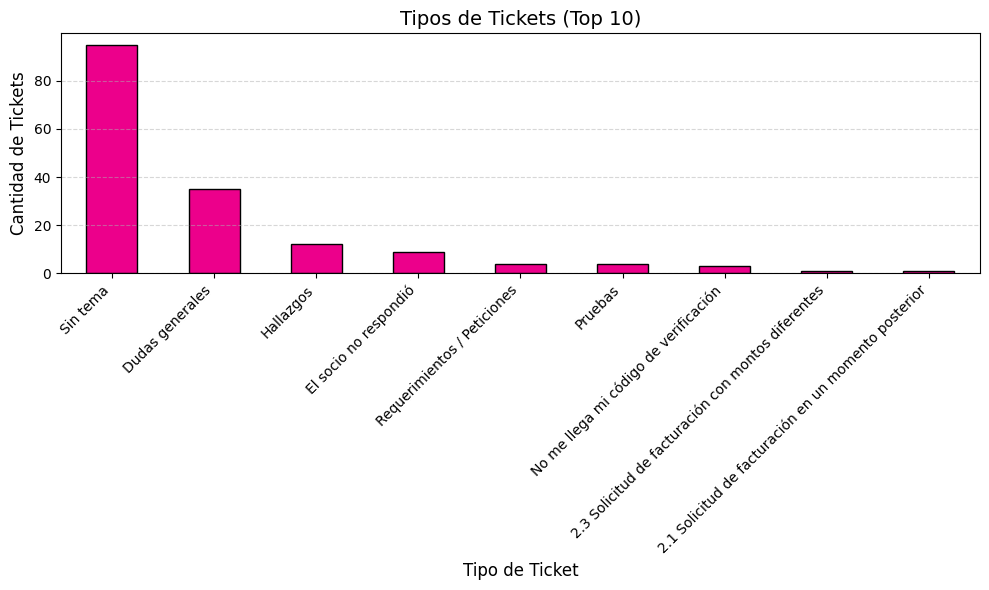

In [289]:
import matplotlib.pyplot as plt
df2 = pd.read_excel("Reporte de tickets 2025.xlsx")

# Paso 0: Limpiar los nombres de columna para evitar errores por espacios
df2.columns = df.columns.str.strip()

# Paso 1: Crear columna auxiliar con los tipos
df2['tema_agente'] = df2['Tipo'].fillna('Sin tema').str.strip()

# Paso 2: Contar los tipos más frecuentes
temas = df2['tema_agente'].value_counts().head(15)

# Paso 3: Graficar
plt.figure(figsize=(10, 6))
temas.plot(kind='bar', color='#EC008B', edgecolor='black')

plt.title('Tipos de Tickets (Top 10)', fontsize=14)
plt.xlabel('Tipo de Ticket', fontsize=12)
plt.ylabel('Cantidad de Tickets', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# 5. Casos Especiales y Alertas

### 5.1 Tickets sin Agente Asignado

In [77]:
pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 23.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


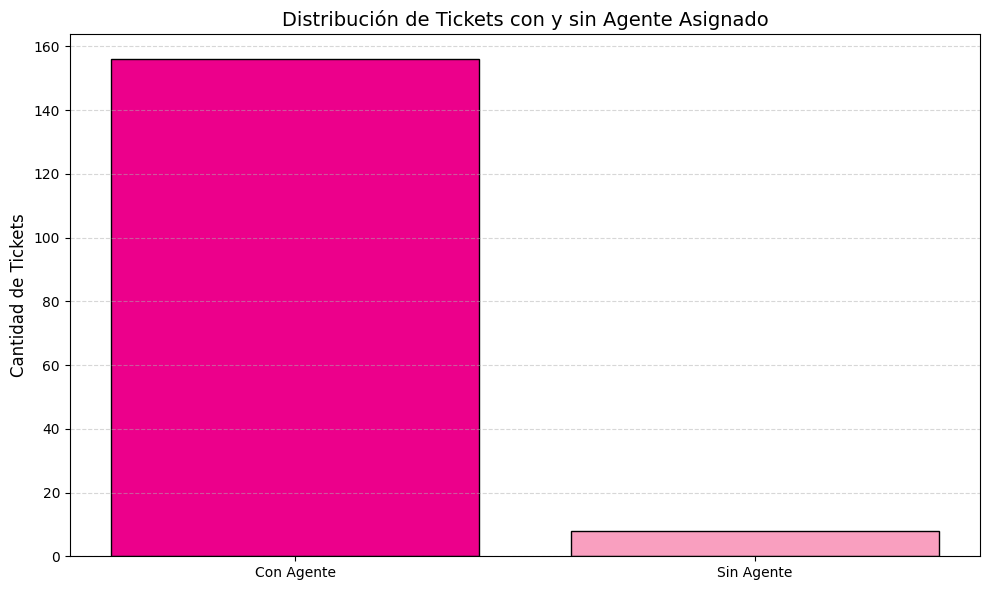

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo Excel
df2 = pd.read_excel("Reporte de tickets 2025.xlsx")

df2['Agente'] = df2['Agente'].astype(str)

# Filtrar tickets sin agente y con agente
sin_agente = df2[df2['Agente'].str.lower() == 'no agent']
con_agente = df2[df2['Agente'].str.lower() != 'no agent']

# Graficar
plt.figure(figsize=(10, 6))
plt.bar(['Con Agente', 'Sin Agente'],
        [len(con_agente), len(sin_agente)],
        color=['#EC008B', '#F99FBF'],
        edgecolor='black')

plt.title('Distribución de Tickets con y sin Agente Asignado', fontsize=14)
plt.ylabel('Cantidad de Tickets', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 
5.2 Tickets con SLA Violado

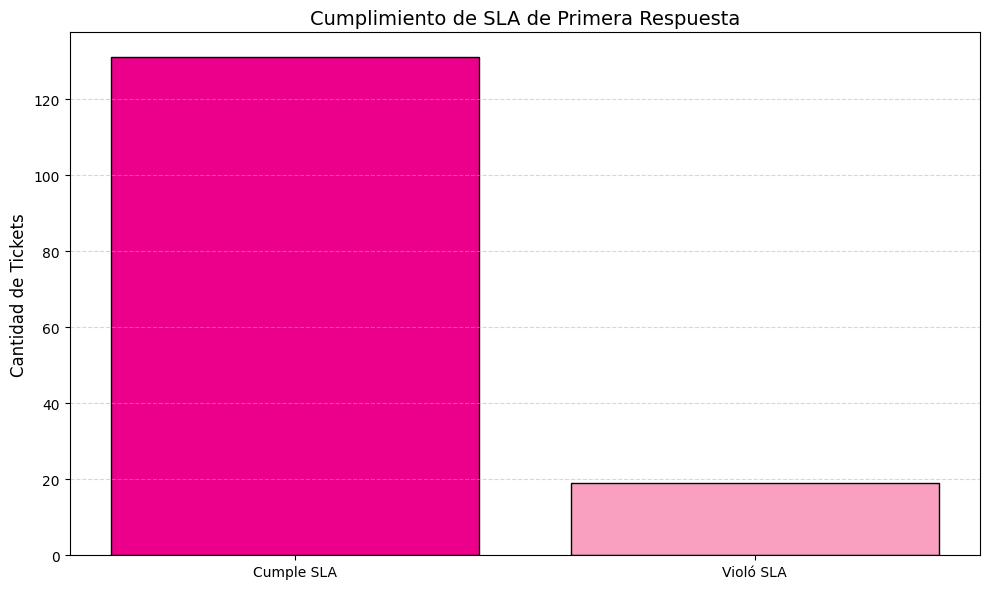

In [86]:
# Normalizar la columna para evitar errores por espacios u otros formatos
df2['Estado de primera respuesta'] = df2['Estado de primera respuesta'].astype(str).str.strip().str.lower()

# Filtrar los tickets que violaron SLA
violados = df2[df2['Estado de primera respuesta'] == 'sla violated']
cumplen = df2[df2['Estado de primera respuesta'] == 'within sla']

# Gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(['Cumple SLA', 'Violó SLA'],
        [len(cumplen), len(violados)],
        color=['#EC008B',"#F99FBF"],
        edgecolor='black')

plt.title('Cumplimiento de SLA de Primera Respuesta', fontsize=14)
plt.ylabel('Cantidad de Tickets', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 5.3 Tickets Abiertos Actualmente

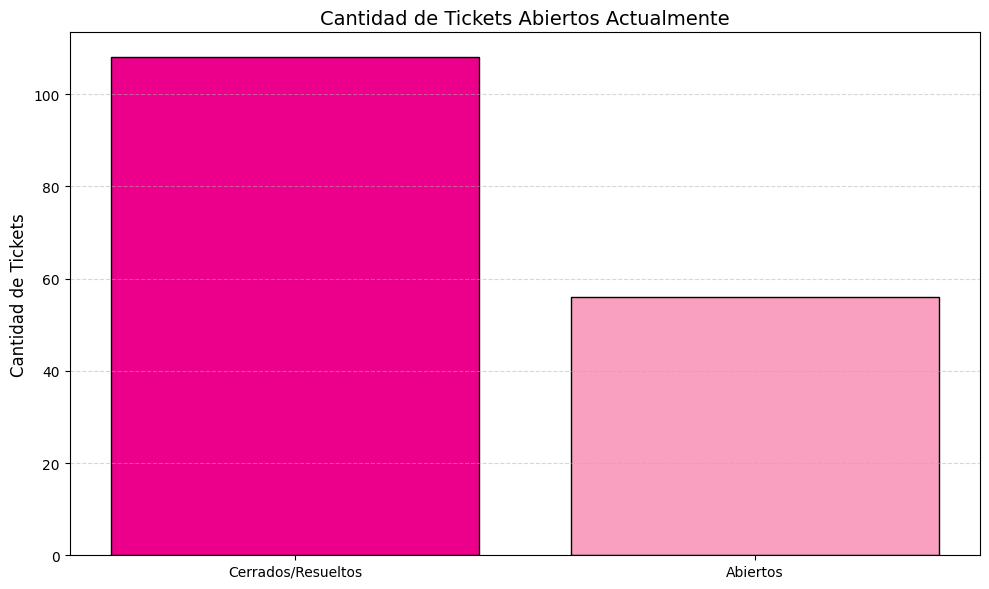

In [89]:
abiertos = df2[df2['Estado'].str.lower() == 'open']

plt.figure(figsize=(10, 6))
plt.bar(['Cerrados/Resueltos', 'Abiertos'], [len(df2) - len(abiertos), len(abiertos)],
        color=['#EC008B', '#F99FBF'], edgecolor='black')
plt.title('Cantidad de Tickets Abiertos Actualmente', fontsize=14)
plt.ylabel('Cantidad de Tickets', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 5.4 Casos Críticos

Total de casos críticos detectados: 65


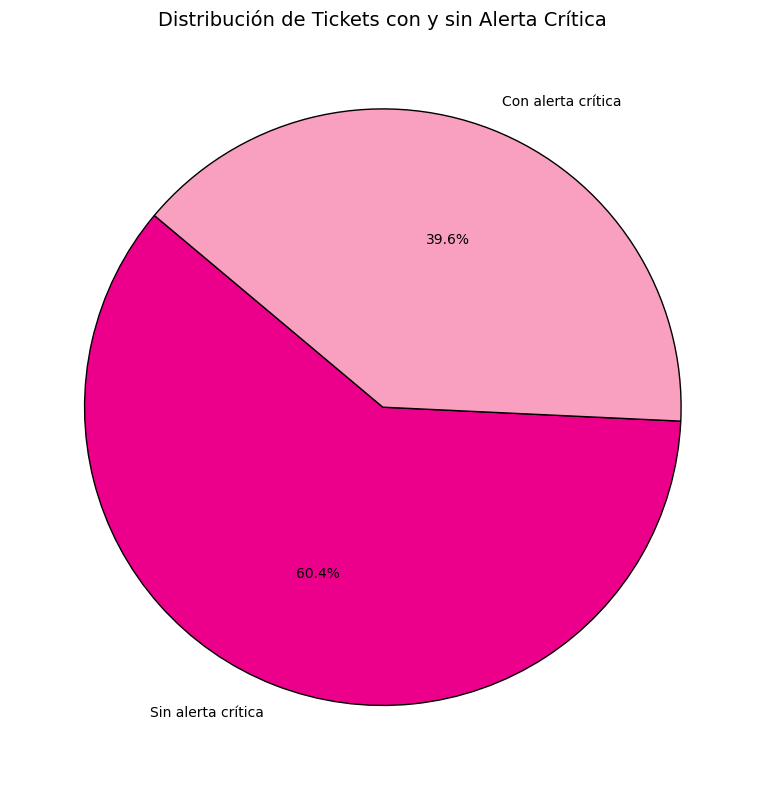

In [92]:
# Normalizamos las columnas necesarias
df2['Estado'] = df2['Estado'].astype(str).str.lower()
df2['Estado de primera respuesta'] = df2['Estado de primera respuesta'].astype(str).str.lower()
df2['Agente inte'] = df2['Agente'].astype(str).str.lower()

# Filtrar casos críticos:
# 1. Tickets sin agente (Agente inte = no agent)
# 2. SLA Violated
# 3. Estado = open
casos_criticos = df2[
    (df2['Agente inte'] == 'no agent') |
    (df2['Estado de primera respuesta'] == 'sla violated') |
    (df2['Estado'] == 'open')
]

# Mostrar resumen
print(f"Total de casos críticos detectados: {len(casos_criticos)}")

import matplotlib.pyplot as plt

# Total de tickets
total_tickets = len(df2)

# Total de casos críticos ya calculado
total_criticos = len(casos_criticos)
total_no_criticos = total_tickets - total_criticos

# Datos y etiquetas
valores = [total_no_criticos, total_criticos]
etiquetas = ['Sin alerta crítica', 'Con alerta crítica']
colores = ['#EC008B', '#F99FBF']

# Gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(valores, labels=etiquetas, colors=colores, autopct='%1.1f%%',
        startangle=140, wedgeprops={'edgecolor': 'black'})

plt.title('Distribución de Tickets con y sin Alerta Crítica', fontsize=14)
plt.tight_layout()
plt.show()

### 5.5 Tickets por Día con SLA Violado

/tmp/ipykernel_44/2266468069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  violados['fecha'] = pd.to_datetime(violados['Hora de creación']).dt.date


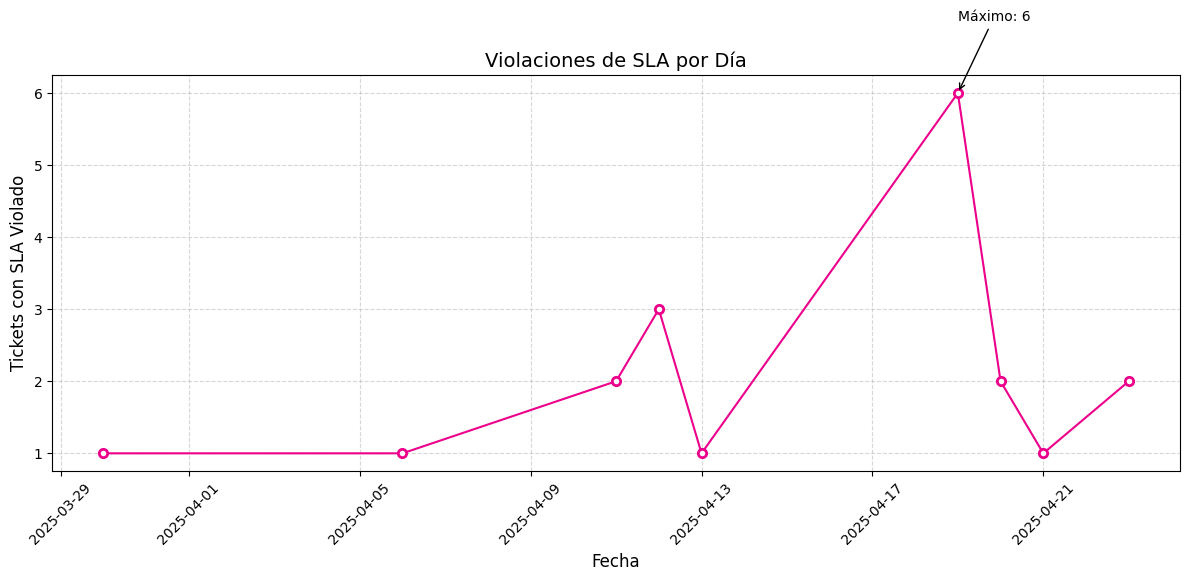

In [95]:
violados['fecha'] = pd.to_datetime(violados['Hora de creación']).dt.date

violaciones_por_dia = violados.groupby('fecha').size()

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(violaciones_por_dia.index, violaciones_por_dia.values,
         marker='o', linestyle='-', color='#EC008B',
         markerfacecolor='white', markeredgecolor='#EC008B', markeredgewidth=2)

# Resaltar el día con más violaciones
max_fecha = violaciones_por_dia.idxmax()
max_valor = violaciones_por_dia.max()
plt.annotate(f'Máximo: {max_valor}',
             xy=(max_fecha, max_valor),
             xytext=(max_fecha, max_valor + 1),
             arrowprops=dict(facecolor='gray', arrowstyle='->'),
             fontsize=10)

plt.title('Violaciones de SLA por Día', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Tickets con SLA Violado', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 6. Indicadores de Eficiencia y Resolución

### 6.1 Porcentaje de Tickets Resueltos por Agente

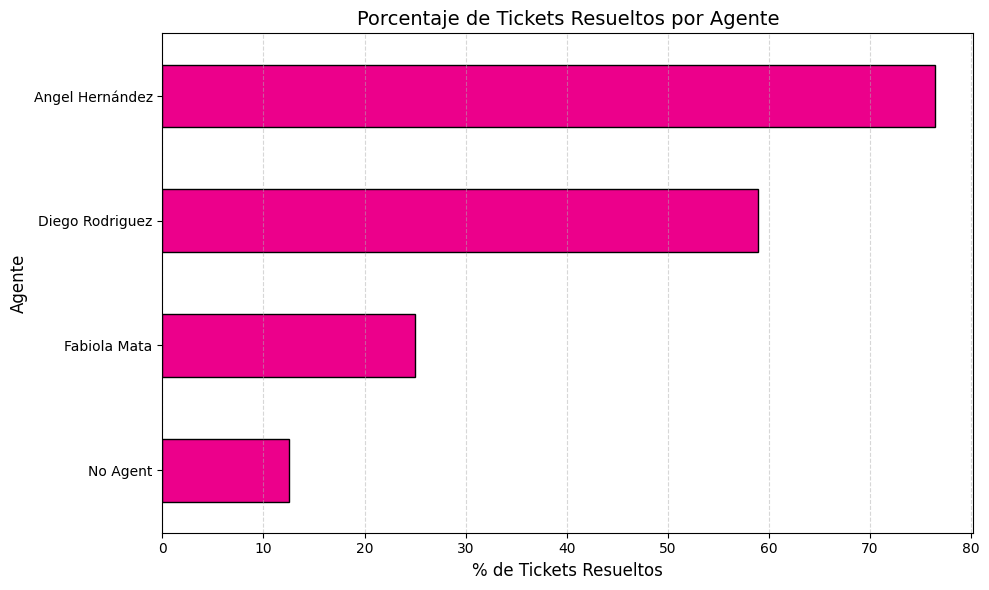

In [376]:
resueltos_por_agente = df.copy()
resueltos_por_agente['resuelto'] = resueltos_por_agente['Estado'].str.lower().isin(['resolved', 'closed'])
resumen_resueltos = resueltos_por_agente.groupby('Agente')['resuelto'].mean() * 100

plt.figure(figsize=(10, 6))
resumen_resueltos.sort_values().plot(kind='barh', color='#EC008B', edgecolor='black')
plt.title('Porcentaje de Tickets Resueltos por Agente', fontsize=14)
plt.xlabel('% de Tickets Resueltos', fontsize=12)
plt.ylabel('Agente', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### 6.2 Relación: Tiempo de Resolución vs. Interacciones del Agente

/tmp/ipykernel_44/1848825697.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_filtrado['resolved_at'] = pd.to_datetime(df2_filtrado['resolved_at'])
/tmp/ipykernel_44/1848825697.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_filtrado['created_at'] = pd.to_datetime(df2_filtrado['created_at'])
/tmp/ipykernel_44/1848825697.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

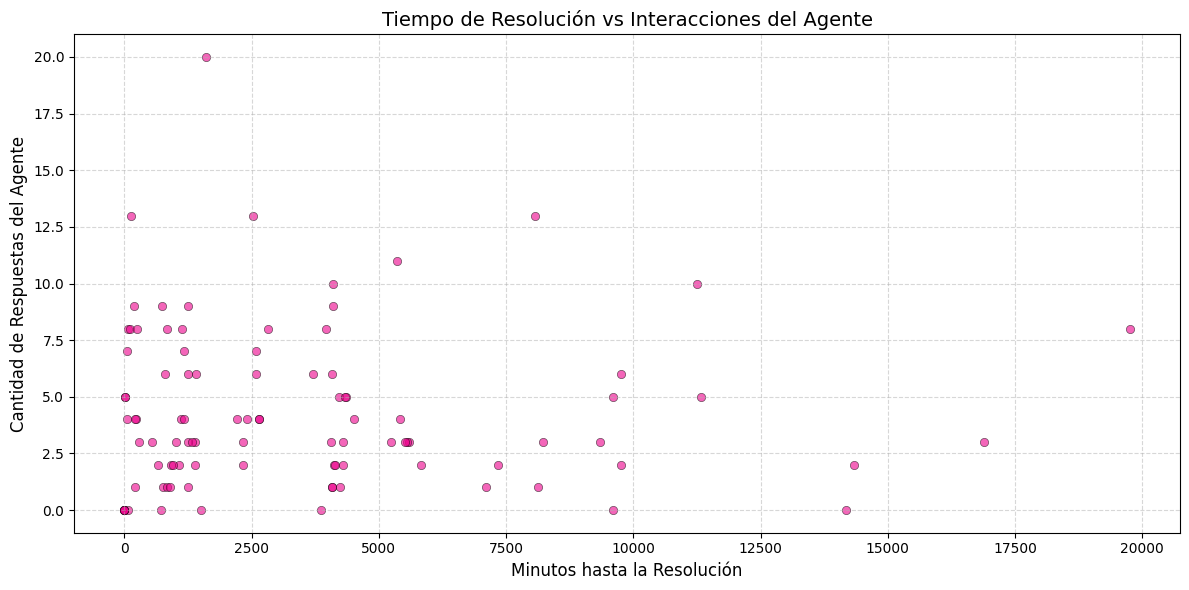

In [101]:
import seaborn as sns
# Normalizar nombres de columnas
df2 = df2.rename(columns={
    'Hora de creación': 'created_at',
    'Hora de resolución': 'resolved_at',
    'Interacciones del agente': 'agent_reply_count'
})

# Eliminar filas con valores nulos en las columnas necesarias
df2_filtrado = df2.dropna(subset=['resolved_at', 'created_at', 'agent_reply_count'])

# Convertir a datetime y calcular minutos de resolución
df2_filtrado['resolved_at'] = pd.to_datetime(df2_filtrado['resolved_at'])
df2_filtrado['created_at'] = pd.to_datetime(df2_filtrado['created_at'])
df2_filtrado['tiempo_resolucion_min'] = (df2_filtrado['resolved_at'] - df2_filtrado['created_at']).dt.total_seconds() / 60

# Graficar
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df2_filtrado,
    x='tiempo_resolucion_min',
    y='agent_reply_count',
    color='#EC008B',
    edgecolor='black',
    alpha=0.6
)

plt.title('Tiempo de Resolución vs Interacciones del Agente', fontsize=14)
plt.xlabel('Minutos hasta la Resolución', fontsize=12)
plt.ylabel('Cantidad de Respuestas del Agente', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 6.3 Semáforo de Desempeño por Agente

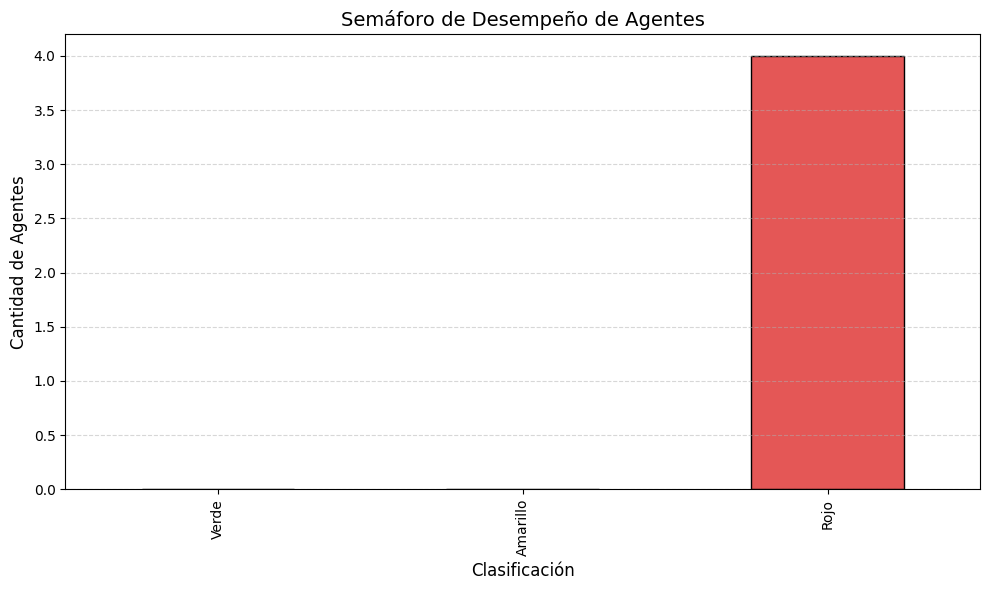

In [442]:
# Hacer una copia para trabajar
df_metricas = df2.copy()

# Marcar si el ticket fue resuelto (Estado = 'Resolved' o 'Closed')
df_metricas['resuelto'] = df_metricas['Estado'].str.strip().str.lower().isin(['resolved', 'closed'])

# Marcar si cumplió con SLA
df_metricas['cumple_sla'] = df_metricas['Estado de resolución'].str.strip().str.lower() == 'within sla'

# Agrupar por agente y calcular porcentajes
desempeno = df_metricas.groupby('Agente').agg({
    'cumple_sla': 'mean',
    'resuelto': 'mean'
}) * 100

# Clasificación por colores según desempeño
def clasificar(r):
    if r['cumple_sla'] >= 90 and r['resuelto'] >= 90:
        return 'Verde'
    elif r['cumple_sla'] >= 70 and r['resuelto'] >= 70:
        return 'Amarillo'
    else:
        return 'Rojo'

desempeno['Semáforo'] = desempeno.apply(clasificar, axis=1)

# Visualización del semáforo
import matplotlib.pyplot as plt

colores = {'Verde': '#54a24b', 'Amarillo': '#f58518', 'Rojo': '#e45756'}

plt.figure(figsize=(10, 6))
desempeno['Semáforo'].value_counts().reindex(['Verde', 'Amarillo', 'Rojo']).plot(
    kind='bar',
    color=[colores.get(x, 'gray') for x in ['Verde', 'Amarillo', 'Rojo']],
    edgecolor='black'
)

plt.title('Semáforo de Desempeño de Agentes', fontsize=14)
plt.xlabel('Clasificación', fontsize=12)
plt.ylabel('Cantidad de Agentes', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# 7. Análisis de Lenguaje Natural y Clusterización de Problemas

### 7.1 Preparación del Texto

In [406]:
# Unimos texto en una sola columna limpia
df['texto_pln'] = df['Asunto'].fillna('') + ' ' + df['Descripción'].fillna('')
df['texto_pln'] = df['texto_pln'].str.lower().fillna('').str.replace(r'\s+', ' ', regex=True)

### 7.2 Vectorización del Texto con TF-IDF

In [412]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

# Asegúrate de haber descargado las stopwords
import nltk
nltk.download('stopwords')

# Cargar stopwords en español
stop_words = stopwords.words('spanish')

# TF-IDF con stopwords personalizadas
tfidf = TfidfVectorizer(max_features=1000, stop_words=stop_words)
X_tfidf = tfidf.fit_transform(df['texto_pln'])

print(f"Dimensión de la matriz TF-IDF: {X_tfidf.shape}")

Dimensión de la matriz TF-IDF: (164, 295)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 7.3 Aplicación de KMeans para Agrupación Temática

In [499]:
from sklearn.cluster import KMeans

# Número de clústeres
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X_tfidf)

# Mostrar resultados relevantes del clúster
columnas_interes = [
    'ID del ticket',
    'Asunto',
    'Descripción',
    'Estado',
    'Estado de resolución',
    'Estado de primera respuesta',
    "Agente",
    "Tipo",
    "Etiquetas",
    'cluster'
]

df_resultado = df[columnas_interes]
df_resultado.head(40)


,ID del ticket,Asunto,Descripción,Estado,Estado de resolución,Estado de primera respuesta,Agente,Tipo,Etiquetas,cluster
0,2993,Hola soy de ladys bbq sucursal vía la luz,Hola soy de ladys bbq sucursal vía la luz,open,NaN,within sla,Diego Rodriguez,NaN,NaN,1
1,2992,Hola,Hola,open,NaN,within sla,Diego Rodriguez,NaN,NaN,1
2,2991,"Hola, necesito atención inmediata.","Hola, necesito atención inmediata.",open,NaN,within sla,Angel Hernández,NaN,NaN,0
3,2990,"Hola, buen día!","Hola, buen día!",open,NaN,sla violated,Angel Hernández,NaN,NaN,1
4,2989,"Hola, estaré al pendiente del envío del compro...","Hola, estaré al pendiente del envío del compro...",open,NaN,sla violated,Diego Rodriguez,NaN,NaN,1
5,2988,Conversation with Peace & Love Gomez Morín MES...,* All Timestamps in GMT -05:00 Bot Selecciona ...,closed,Within SLA,nan,Angel Hernández,NaN,NaN,1
6,2987,"Hola, necesito atención inmediata.","Hola, necesito atención inmediata.",closed,Within SLA,within sla,Angel Hernández,El socio no respondió,NaN,0
7,2986,"Hola, necesito atención inmediata.","Hola, necesito atención inmediata.",closed,Within SLA,within sla,Angel Hernández,Dudas generales,NaN,0
8,2985,"Hola, necesito atención inmediata.","Hola, necesito atención inmediata.",resolved,Within SLA,within sla,Angel Hernández,Dudas generales,NaN,0
9,2984,"Hola, necesito atención inmediata.","Hola, necesito atención inmediata.",open,NaN,within sla,Angel Hernández,Dudas generales,NaN,0


### 7.4 Palabras Representativas por Clúster

In [502]:
import numpy as np

# Extraer top palabras por clúster
def top_words_por_cluster(tfidf_matrix, kmeans_model, vectorizer, n_top_words=10):
    palabras = vectorizer.get_feature_names_out()
    orden_centroides = kmeans_model.cluster_centers_.argsort()[:, ::-1]
    
    for i in range(kmeans_model.n_clusters):
        top_palabras = [palabras[indice] for indice in orden_centroides[i, :n_top_words]]
        print(f"Clúster {i}: {', '.join(top_palabras)}\n")

top_words_por_cluster(X_tfidf, kmeans, tfidf, 30)

Clúster 0: atención, inmediata, necesito, hola, cobrarle, cobro, colaborador, comentará, compartir, comprobante, comunicar, clubers, consumidor, contacté, conversation, creo, cuentas, código, códigos, concordia, below, bot, breve, buen, buena, buenas, buenos, cambiar, cluber, casa

Clúster 1: hola, buen, día, gracias, ayuda, pm, apr, quiero, necesito, file, fabi, hablar, agente, terminal, saludos, faby, caso, 2911, factura, pago, socio, mar, pudo, error, dia, 09, si, quería, saber, noches

Clúster 2: tardes, buenas, dudas, hola, reportaste, siguiente, incidente, quiero, consumidor, concordia, comunicar, comprobante, contacté, conversation, compartir, comentará, creo, colaborador, cobro, cuentas, códigos, cobrarle, clubers, below, bot, breve, buen, buena, buenos, cambiar



### 7.5 Visualización en 2D con PCA

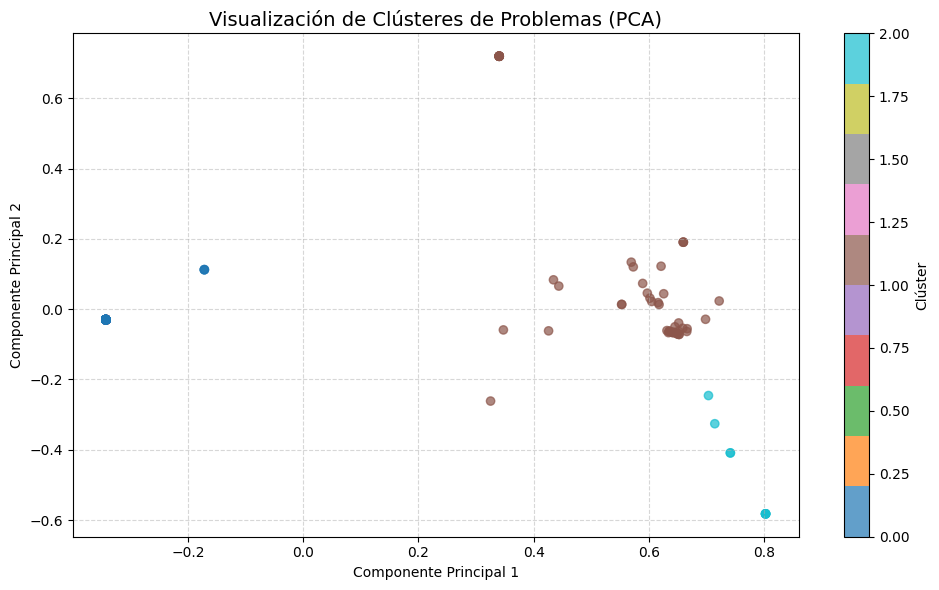

In [505]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_tfidf.toarray())

plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['cluster'], cmap='tab10', alpha=0.7)
plt.title('Visualización de Clústeres de Problemas (PCA)', fontsize=14)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(scatter, label='Clúster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [71]:
df.to_csv("tickets_limpios_json.csv", index=False)

In [107]:
df2.to_csv("reporte_tickets_limpio.xlsx", index=False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9d953f82-6c1f-43d0-956a-46bf4a93af20' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>